In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import sys
import numpy as np

In [5]:
CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.parent.joinpath('Data','Raw')

-----

# Exploratory data analysis

In [6]:
import pandas as pd

df = pd.read_csv(str(DATA_DIR)+'/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


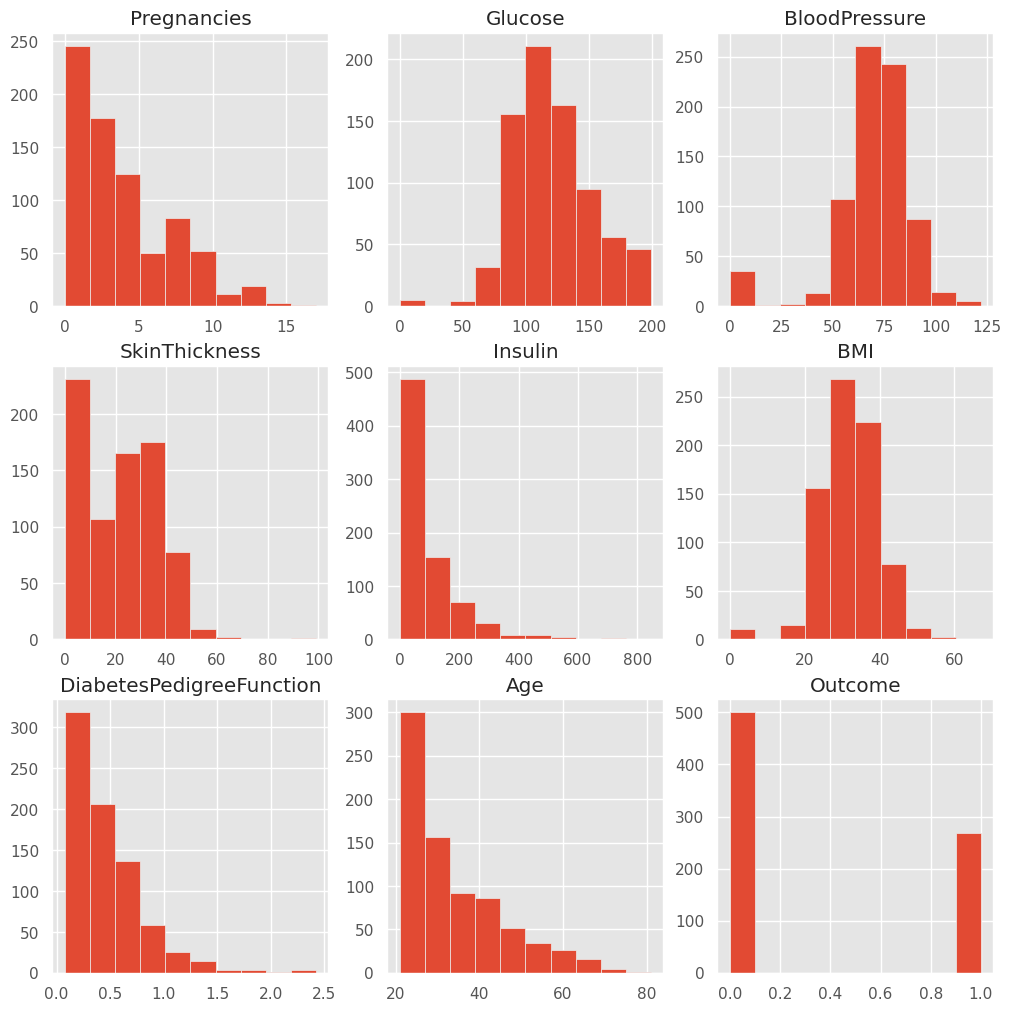

In [8]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

names = list(df.columns)
fig, ax = plt.subplots(3,3,figsize=(10, 10), layout='constrained')

for i,ax in enumerate(ax.flat):
    ax.hist(x=df.iloc[:,i])
    ax.set_title(f'{names[i]}')
    
plt.show()

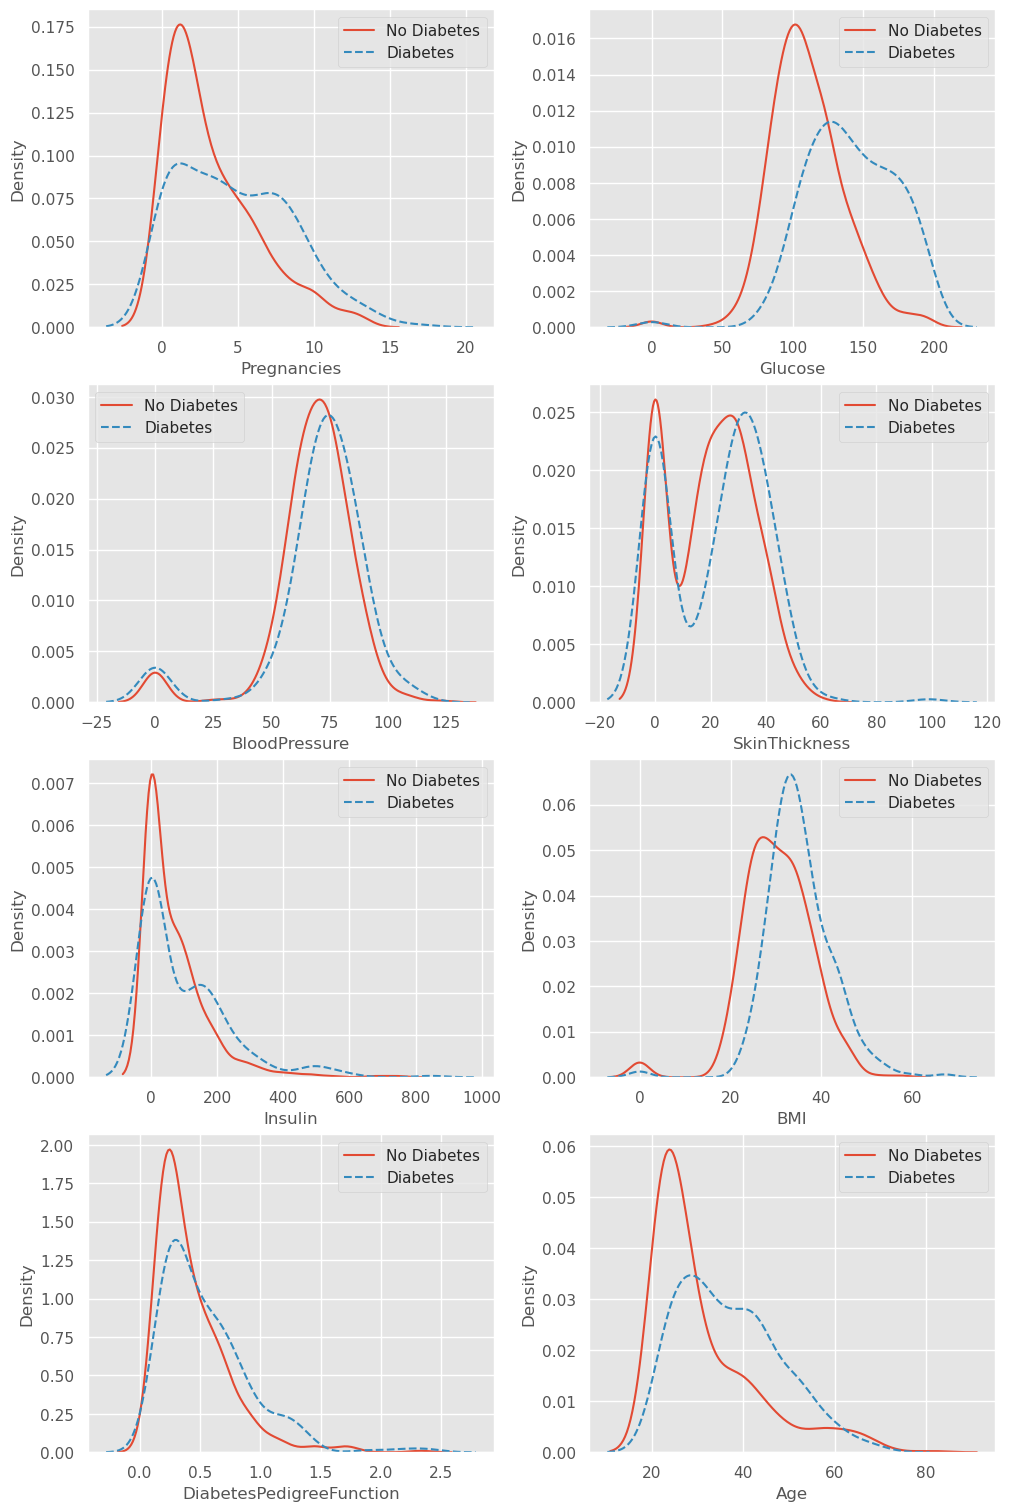

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

names = list(df.columns)

fig, ax = plt.subplots(4,2,figsize=(10, 15), layout='constrained')
for i,ax1 in enumerate(ax.flat):
    sns.kdeplot(data=df,
                x=df.loc[df.Outcome == 0][names[i]],
                ax=ax1,
                linestyle="-",
                label= 'No Diabetes'
                )
    
    sns.kdeplot(data=df,
                x=df.loc[df.Outcome == 1][names[i]],
                ax=ax1,
                linestyle="--",
                label = 'Diabetes'
                )
    #ax1.set_title(names[i])
    ax1.legend(loc='best')
    if i==7:
        break

plt.show()

-----

# Data preprocessing

## Handling missing values

We use `isnull()` function

In [50]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In any case, we need to handle 0 values. Let's take a look at how many 0 values are there in each column to understand the extend of the problem

In [66]:
print('Number of rows with 0 values for eachm variable')
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(f'{col}: {missing_rows}')

Number of rows with 0 values for eachm variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


First, let's replace the 0 values in the glucose, bloodpressure, skinthinckness, insulin and bmi columns with NaN

In [67]:
df['Glucose']       = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin']       = df['Insulin'].replace(0, np.nan)
df['BMI']           = df['BMI'].replace(0, np.nan)

Now let's confirm that the Glucose, BloodPressure, SkinThickness, Insulin and BMI columns no longer contain 0 values

In [69]:
print('Number of rows with 0 values for eachm variable')
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(f'{col}: {missing_rows}')

Number of rows with 0 values for eachm variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


Now, let's replace the NaN values with the mean of the non-missing values, we can do this using the handy `fillna()` function in pandas as follow:

In [90]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure']= df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness']= df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [91]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [92]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


-----

# Data Standardization

to standardize our data, we can use the preprocessing class from scikit-learn

In [93]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

In [94]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [103]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [105]:
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


----- 

# Save Data

In [115]:
DATA_SAVE = DATA_DIR.parent.joinpath('Process')
df.to_csv(str(DATA_SAVE)+'/data.csv')